In [1]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Final Project: Solutions by Nkem Mbachu') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Final Project: Solutions by Nkem Mbachu
Local Time: 2023-07-30 12:34:57
Computer ID: Nkem


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# ETL

In [3]:
df=pd.read_csv(r'C:\Users\mbach\Downloads\Data Science files\rm-yields-data.csv')

In [4]:
gdf=gpd.read_file(r'C:\Users\mbach\Downloads\Data Science files\RM_shapefile\RuralMunicipality.shp')

In [5]:
gdf['RMNO']=gdf['RMNO'].astype('int').astype('string')

## Scoping

## Data Collections

In [6]:
df['Spring Wheat']

0         4.0
1         9.0
2        12.0
3        18.0
4        20.0
         ... 
25307    59.5
25308    63.9
25309    55.1
25310    17.0
25311    66.8
Name: Spring Wheat, Length: 25312, dtype: float64

In [7]:
ds= pd.DataFrame()

ds['Spring Wheat Mean']=df.loc[(df['Year'] > 2012) & (df['Year'] <= 2022)].groupby('RM').mean()['Spring Wheat']
ds['Spring Wheat Std']=df.loc[(df['Year'] > 2012) & (df['Year'] <= 2022)].groupby('RM').std()['Spring Wheat']

In [8]:
ds = ds.reset_index()

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RM                 295 non-null    int64  
 1   Spring Wheat Mean  295 non-null    float64
 2   Spring Wheat Std   294 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.0 KB


In [10]:
ds['RM']=ds['RM'].astype('string')

In [11]:
gds = gpd.GeoDataFrame(pd.merge(ds, gdf.rename(columns={'RMNO':'RM'})[['RM', 'geometry']], on='RM'))

In [12]:
gds=gds.loc[gds['RM']!='521']

<Axes: >

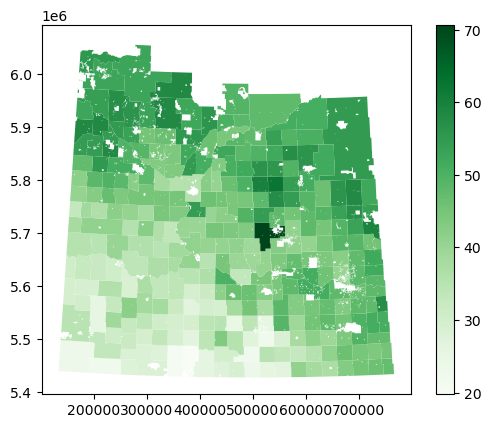

In [13]:
gds.plot('Spring Wheat Mean', legend=True, cmap='Greens')

<Axes: >

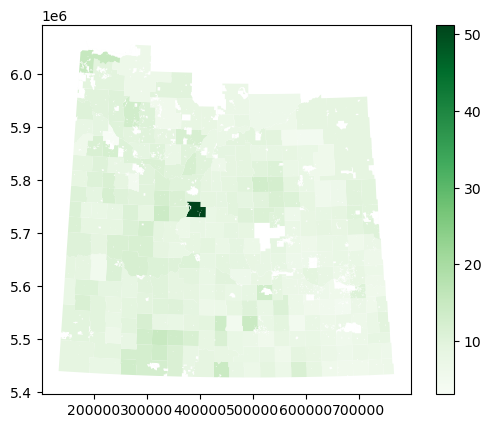

In [14]:
gds.plot('Spring Wheat Std', legend=True, cmap='Greens')

In [15]:
gds.isna().sum()

RM                   0
Spring Wheat Mean    0
Spring Wheat Std     1
geometry             0
dtype: int64

In [16]:
df.loc[(df['RM']==279) & (df['Year'] > 2012)]['Spring Wheat'].isna()

14340    False
14341     True
14342     True
14343     True
14344     True
14345     True
14346     True
14347     True
14348     True
14349     True
Name: Spring Wheat, dtype: bool

In [17]:
ds

,RM,Spring Wheat Mean,Spring Wheat Std
0,1,47.076667,6.511628
1,2,45.938889,6.218477
2,3,45.365000,5.569120
3,4,42.921000,5.556423
4,5,37.102000,5.937401
...,...,...,...
290,520,49.314000,7.153366
291,555,58.235714,9.897336
292,561,52.676000,9.561346
293,588,52.661000,6.508786


In [18]:
ds=ds.dropna()

In [19]:
ds.isna().sum()

RM                   0
Spring Wheat Mean    0
Spring Wheat Std     0
dtype: int64

<Axes: >

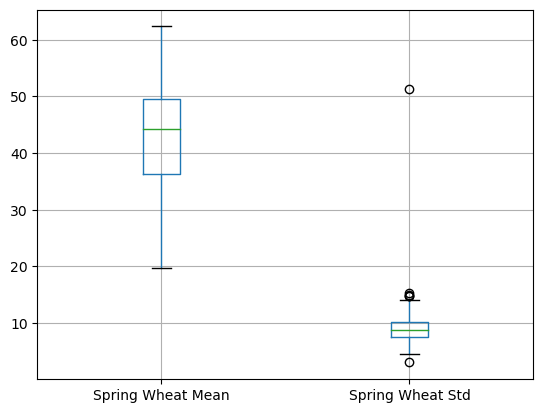

In [20]:
ds.boxplot()

In [21]:
from scipy.stats import zscore # (std - mean) / std data standardization

In [22]:
zscore(ds.set_index('RM')).sort_values('Spring Wheat Mean') 
# In case of normal distribution

# 68% data is located -1 and 1
# 95% is located -2 and 2
# 98% is located -3 and 3

,Spring Wheat Mean,Spring Wheat Std
RM,,
44,-2.594532,-0.273174
45,-2.482067,0.747681
40,-2.323469,-0.327447
19,-2.273412,-0.345265
69,-2.262798,-1.021058
...,...,...
471,1.704834,0.022940
472,1.715672,-0.296842
271,1.824276,0.463604


<Axes: xlabel='Year'>

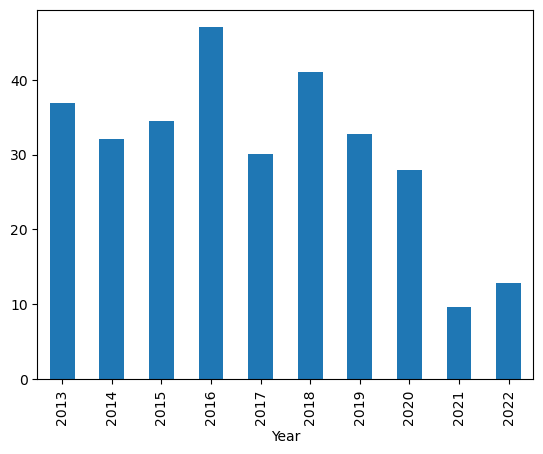

In [23]:
df.loc[(df['RM']== 141) & (df['Year'] > 2012)]\
    .set_index('Year')\
    ['Spring Wheat'].plot(kind = 'bar')

array([[<Axes: title={'center': 'Spring Wheat Mean'}>,
        <Axes: title={'center': 'Spring Wheat Std'}>]], dtype=object)

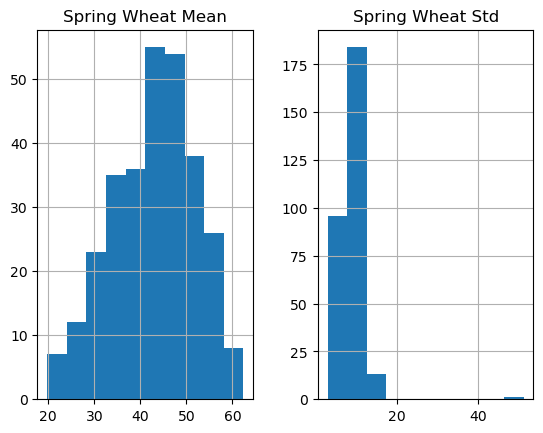

In [24]:
ds.hist()

In [25]:
ds.isna().sum()

RM                   0
Spring Wheat Mean    0
Spring Wheat Std     0
dtype: int64

# Unsupervised Machine Learning

## K Means

In [26]:
# Importing library
from sklearn.cluster import KMeans 

# Let's define our features
X = ds.set_index('RM')

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM = KMeans(n_clusters=n, init='k-means++').fit(X)
    clusters_inertia.append(KM.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

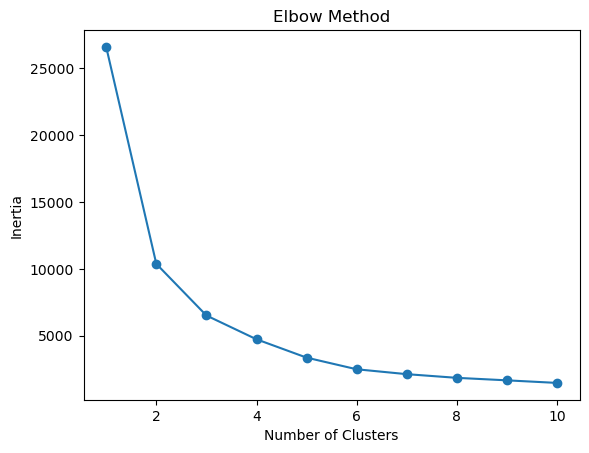

In [27]:
max_clusters = 10

# Perform K-means clustering for different number of clusters
inertia = []
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

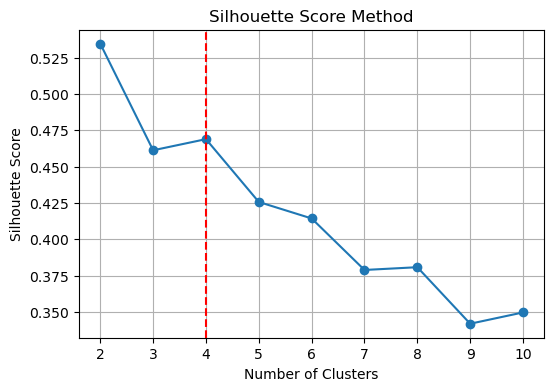

In [28]:
# Set the range of clusters to test
min_clusters = 2
max_clusters = 10

# Perform K-means clustering for different number of clusters
n_clusters = range(min_clusters, max_clusters + 1)
s_scores = []
for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    s_score = silhouette_score(X, labels)
    s_scores.append(s_score)

# Plot the silhouette scores
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(n_clusters, s_scores, marker='o')
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(4, ls="--", c="red")
ax.grid(True)
plt.show()

In [29]:
# Cluster 3
df_3_clusters = KMeans(n_clusters=3, init='k-means++').fit(X) # initialise and fit K-Means model

df_3= X.copy()
df_3.loc[:,'Cluster_4'] = df_3_clusters.labels_ # append labels to points

# Clusters 4
df_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(X) # initialise and fit K-Means model

df_4= X.copy()
df_4.loc[:,'Cluster_4'] = df_4_clusters.labels_ # append labels to points

# Clusters 5
df_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X) # initialise and fit K-Means model

df_5= X.copy()
df_5.loc[:,'Cluster_4'] = df_5_clusters.labels_ # append labels to points

In [30]:
gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'})

,RM,geometry
0,95,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,378,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,288,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,106,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,132,"POLYGON ((445175.620 5573313.600, 445572.880 5..."
...,...,...
293,588,"MULTIPOLYGON (((307104.520 6003527.820, 307139..."
294,352,"POLYGON ((187054.680 5758478.840, 187005.860 5..."
295,351,"POLYGON ((209380.850 5785495.100, 209851.950 5..."
296,520,"MULTIPOLYGON (((451283.150 5981138.420, 451285..."


<Axes: >

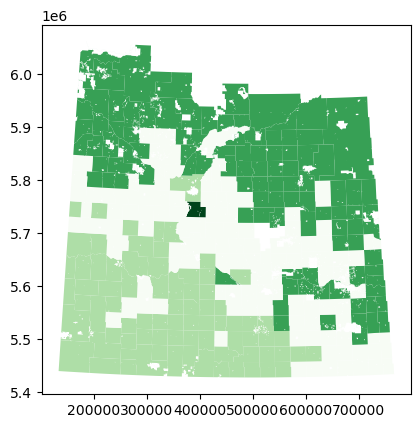

In [31]:
gpd.GeoDataFrame(pd.merge(
    df_4,
    gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'}),
     on='RM' )).plot('Cluster_4', cmap='Greens', scheme='naturalbreaks', k=4)

In [32]:
df_4.groupby('Cluster_4').mean()

,Spring Wheat Mean,Spring Wheat Std
Cluster_4,,
0,42.782445,8.476029
1,30.890118,9.321683
2,52.154047,8.833773
3,54.199000,51.264053


In [33]:
df_4.groupby('Cluster_4')\
    .mean()\
    .sort_values('Spring Wheat Mean')

,Spring Wheat Mean,Spring Wheat Std
Cluster_4,,
1,30.890118,9.321683
0,42.782445,8.476029
2,52.154047,8.833773
3,54.199000,51.264053


In [34]:
df_4['Cl_4']=df_4['Cluster_4'].replace(to_replace={
    0:0,
    2:1,
    1:2,
    3:3
})

In [35]:
df_4

,Spring Wheat Mean,Spring Wheat Std,Cluster_4,Cl_4
RM,,,,
1,47.076667,6.511628,0,0
2,45.938889,6.218477,0,0
3,45.365000,5.569120,0,0
4,42.921000,5.556423,0,0
5,37.102000,5.937401,0,0
...,...,...,...,...
520,49.314000,7.153366,2,1
555,58.235714,9.897336,2,1
561,52.676000,9.561346,2,1


<Axes: >

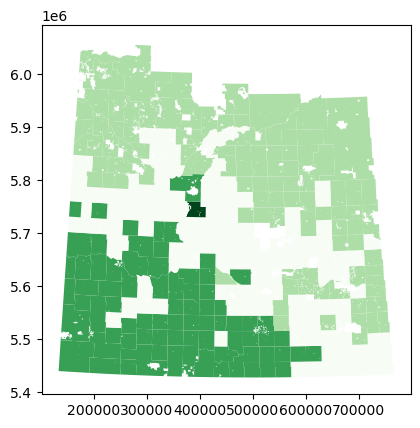

In [36]:
gpd.GeoDataFrame(pd.merge(
    df_4,
    gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'}),
     on='RM' )).plot('Cl_4', cmap='Greens', scheme='naturalbreaks', k=4)

In [37]:
gpd.GeoDataFrame(pd.merge(
    df_4,
    gdf[['RMNO', 'geometry']].rename(columns = {'RMNO': 'RM'}),
     on='RM' )).to_file('Spring_Wheat_rm_clustering.geojson', driver='GeoJSON')